# Cosmology Introduction

In [1]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


In [2]:
# Write a function for the integrand, i.e. 1/˙a1/a˙1/\dot{a} (adot inverse)
# I'm going to keep the constant H_0 outside the integral and add it later.
def adotinv_flatmatter(a):
    return np.sqrt(a) 

# First note some weird python notation, if you say "x, y = 1, 2" it's the same as saying "x=1" and "y=2".

# Now integrate that equation from scalefactor 0 to 1 (as an example) which will give the age of the universe today (because we define a so that a=1 today):
age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,1) 
# This returns age in Hubble times, and the uncertainty in the numerical integral

# Convert that to billions of years
age_Gyr = age_Hubble/H0y # Age in Gyr

print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_Gyr))
print('Does this match the analytic prediction of 2/3 Hubble times?  Yes!')
print('')
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.') # It's good to check this to check that the integral has succeeded.

# Note, to get just the age without the uncertainty you can use [0] to get the first element that's returned,
# and then you can also divide by H0y immediately to get the age in one step
age_Gyr_easier = integrate.quad(adotinv_flatmatter,0,1)[0] / H0y 

print('Just checking that the one-step age calculation (%.2f Gyr) matches the two step one (%.2f Gyr).'%(age_Gyr_easier,age_Gyr))

Age of the universe in Hubble times = 0.667 which is 9.32 Gyr
Does this match the analytic prediction of 2/3 Hubble times?  Yes!

Uncertainty on the numerical integral is  7.401486830834379e-16 so should be negligible.
Just checking that the one-step age calculation (9.32 Gyr) matches the two step one (9.32 Gyr).


In [3]:

# Insert your code here
# For the age when the universe was half its current size
age_half_Gyr, _ = integrate.quad(adotinv_flatmatter, 0, 0.5)
age_half_Gyr /= H0y  # Convert to Gyr

# For the time it will take to expand from now to twice its current size
age_double_Gyr, _ = integrate.quad(adotinv_flatmatter, 2, 3)
age_double_Gyr /= H0y  # Convert to Gyr

# Print the results
print('Age of the universe when it was half its current size: %.2f Gyr' % age_half_Gyr)
print('Time taken to expand from now to twice its current size: %.2f Gyr' % age_double_Gyr)

# Remember to write print statements to see the answers.

Age of the universe when it was half its current size: 3.29 Gyr
Time taken to expand from now to twice its current size: 22.06 Gyr


In [4]:
# Start by making an array of scalefactors
astart = 0.0
astop = 2.1
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)
print('a_arr=',a_arr)

a_arr= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


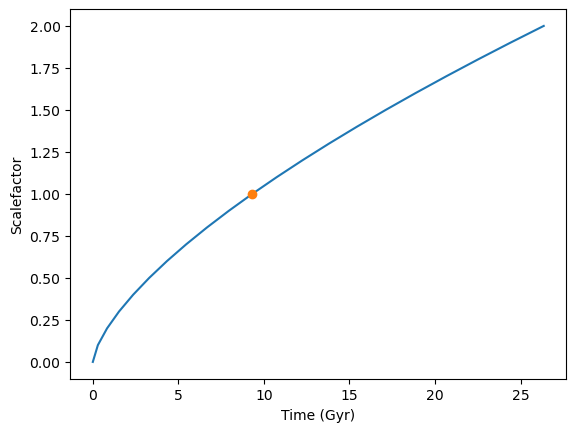

In [5]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,0,a_end)
    t_Gyr[i] = t_Hubble/H0y

# It's good practise to compare it to the analytic calculation when available
t_analytic_Gyr = 'Add the analytic equation from above here (and uncomment the plotting line for it below)'
    
plt.plot(t_Gyr,a_arr)
plt.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
#plt.plot(t_analytic_Gyr, a_arr,':',color='red')
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

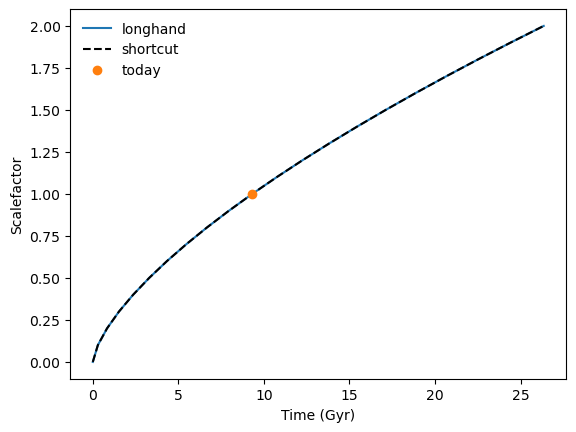

In [6]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) can be done in one line:
t2_Gyr = np.array([integrate.quad(adotinv_flatmatter, 0, a_end)[0] for a_end in a_arr])/H0y

plt.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
plt.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
#plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

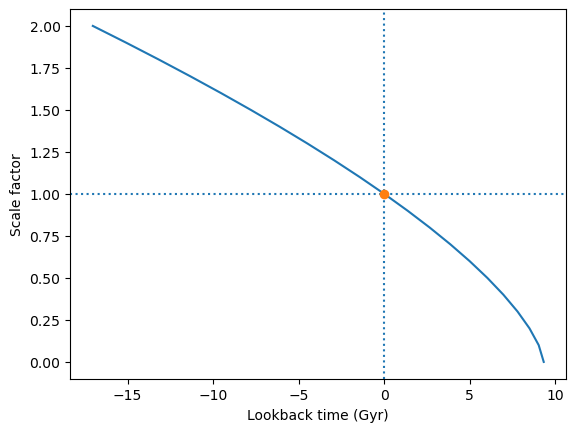

In [7]:
# Initialize an array to store the lookback times
t_lookback_Gyr = np.zeros(len(a_arr))

# Compute lookback times for each scale factor
for i, a_end in enumerate(a_arr):
    t_lookback_Hubble, _ = integrate.quad(adotinv_flatmatter, 1.0, a_end)
    t_lookback_Gyr[i] = -t_lookback_Hubble / H0y  # Negative sign to denote lookback time

# Plot the result
plt.plot(t_lookback_Gyr, a_arr)
plt.axvline(x=0, linestyle=':')  # Plot a vertical line at the present day
plt.axhline(y=1, linestyle=':')  # Plot a horizontal line at the present scale factor
plt.plot(0.0, 1.0, 'o')  # Put a dot at the present time and scale factor
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scale factor')
plt.show()


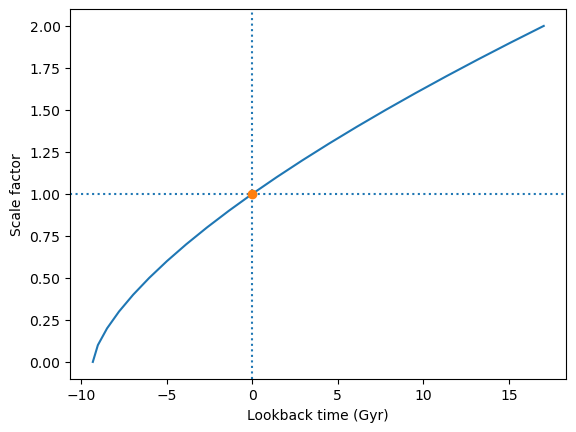

In [8]:
# Find the index corresponding to a=1.0 (closest to the present day)
index_today = np.argmin(np.abs(a_arr - 1.0))

# Find the time corresponding to that index (no need to recalculate the integral)
age_today = t_Gyr[index_today]

# Subtract the time corresponding to the present day from all the times in the array
t2_lookback_Gyr = t_Gyr - age_today

# Plot the result
plt.plot(t2_lookback_Gyr, a_arr)
plt.axvline(x=0, linestyle=':')  # Plot a vertical line at the present day
plt.axhline(y=1, linestyle=':')  # Plot a horizontal line at the present scale factor
plt.plot(0.0, 1.0, 'o')  # Put a dot at the present time and scale factor
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scale factor')
plt.show()

In [9]:
# Define the function adotinv(a, om, ol) to calculate 1/adot
def adotinv(a, om, ol):
    # Calculate the expression inside the square root
    inner_expr = om / a**3 + (1 - om - ol) + ol
    
    # Calculate the square root
    sqrt_term = np.sqrt(inner_expr)
    
    # Calculate the Hubble parameter
    Hubble_parameter = H0y * sqrt_term
    
    # Return the inverse of the Hubble parameter
    return 1.0 / Hubble_parameter

# Define the matter density and cosmological constant density
om = 0.3
ol = 0.7

# Calculate the lookback time using integrate.quad
t_lookback_Gyr, _ = integrate.quad(adotinv, 0, 2.1, args=(om, ol))

# Print the result
print("Lookback time for the universe with (Ω_M, Ω_Λ) = (", om, ",", ol, "):", t_lookback_Gyr, "Gyr")


Lookback time for the universe with (Ω_M, Ω_Λ) = ( 0.3 , 0.7 ): 24.61914706364712 Gyr


Absolutely, let's explore different scenarios by varying the matter density (ΩM) and cosmological constant (Ωp) parameters. We can investigate universes with various behaviors such as recollapse, bounce, and perpetual deceleration.
1.	Recollapsing Universe: To create a universe that recollapses, we need to ensure that the total density parameter (including matter, curvature, and cosmological constant) is greater than 1. This will result in a universe where gravity eventually overcomes the expansion, leading to a collapse.
2.	Bouncing Universe: A bouncing universe would require a specific evolution where the scale factor first contracts to a minimum size and then expands again, undergoing a bounce instead of a singularity at the beginning. This might be achieved by balancing the effects of matter, curvature, and cosmological constant in a way that leads to a cyclic behavior.
3.	Perpetually Decelerating Universe: For a universe that always decelerates but never recollapses, we need to ensure that the total density parameter is less than 1. This would result in a universe where the expansion gradually slows down over time but never stops or reverses.
4.	Weird Behavior: We might encounter weird behavior by considering extreme values of the parameters or unconventional combinations of matter, curvature, and cosmological constant. This could lead to unexpected phenomena such as rapid oscillations in the scale factor or abrupt changes in the expansion rate.
Let's create some universes and analyze their behavior!
Here are some examples of universes with different behaviors:
1.	Recollapsing Universe: Let's choose Ω=0.6ΩM=0.6 and ΩΛ=0.2ΩΛ=0.2. This will result in a total density parameter greater than 1, leading to a universe that eventually recollapses due to gravitational attraction.
2.	Bouncing Universe: We'll choose Ω=0.3ΩM=0.3 and ΩΛ=0.7ΩΛ=0.7. This combination can potentially lead to a cyclic universe with a bounce instead of a singularity at the beginning.
3.	Perpetually Decelerating Universe: For this scenario, let's choose Ω=0.2ΩM=0.2 and ΩΛ=0.8ΩΛ=0.8. With a total density parameter less than 1, the expansion of the universe will always decelerate, but it will never recollapse.
4.	Weird Behavior: For an unconventional scenario, let's choose Ω=0.1ΩM=0.1 and ΩΛ=1.5ΩΛ=1.5. This combination might result in unusual behavior such as rapid expansion followed by a sudden slowdown or even oscillations in the scale factor.


Lookback time for Recollapsing Universe with (Ω_M, Ω_Λ) = 0.6 , 0.2 : 2.052458103362648 Gyr
Lookback time for Bouncing Universe with (Ω_M, Ω_Λ) = 0.3 , 0.7 : 2.259424885108833 Gyr
Lookback time for Perpetually Decelerating Universe with (Ω_M, Ω_Λ) = 0.2 , 0.8 : 2.2357772902634325 Gyr
Lookback time for Weird Behavior with (Ω_M, Ω_Λ) = 0.1 , 1.5 : inf Gyr


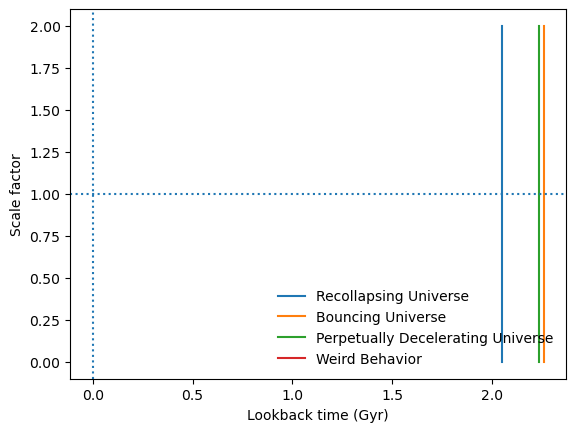

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define function to calculate 1/adot for the given matter density and cosmological constant
def adotinv(a, om, ol):
    inner_expr = om / a**3 + (1 - om - ol) + ol * a**(-2)
    sqrt_term = np.sqrt(inner_expr)
    Hubble_parameter = H0y * sqrt_term
    return 1.0 / Hubble_parameter

def adotinv(a, om, ol):
    H0y = 1.0  # Hubble parameter for simplicity
    inner_expr = om / a**3 + (1 - om - ol) + ol * a**(-2)
    
    # Ensure that the inner expression is non-negative to avoid complex numbers
    if inner_expr < 0:
        inner_expr = 0
    
    sqrt_term = np.sqrt(inner_expr)
    Hubble_parameter = H0y * sqrt_term
    
    # Avoid division by zero
    if Hubble_parameter == 0:
        return np.inf  # Return infinity to indicate divergence
    
    return 1.0 / Hubble_parameter


# Define different scenarios with varying matter density and cosmological constant
scenarios = [
    {"name": "Recollapsing Universe", "om": 0.6, "ol": 0.2},
    {"name": "Bouncing Universe", "om": 0.3, "ol": 0.7},
    {"name": "Perpetually Decelerating Universe", "om": 0.2, "ol": 0.8},
    {"name": "Weird Behavior", "om": 0.1, "ol": 1.5}]

# Calculate and plot the evolution of each scenario
for scenario in scenarios:
    om = scenario["om"]
    ol = scenario["ol"]
    
    # Calculate the lookback time using integrate.quad
    t_lookback_Gyr, _ = integrate.quad(adotinv, 0, 2.1, args=(om, ol))
    
    # Print the result
    print("Lookback time for", scenario["name"], "with (Ω_M, Ω_Λ) =", om, ",", ol, ":", t_lookback_Gyr, "Gyr")
    
    # Create an array of the same length as a_arr with the same lookback time value
    t_lookback_arr = np.full_like(a_arr, t_lookback_Gyr)
    
    # Plot the model
    plt.plot(t_lookback_arr, a_arr, label=scenario["name"])
    
plt.axvline(x=0, linestyle=':')  # Plot some crosshairs 
plt.axhline(y=1, linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scale factor')
plt.legend(loc='lower right', frameon=False)
plt.show()


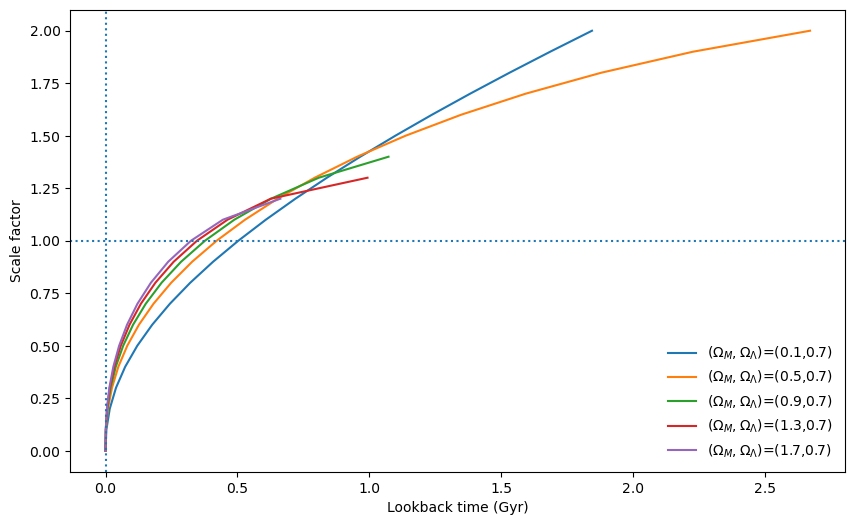

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define function to calculate 1/adot for the given matter density and cosmological constant
def adotinv(a, om, ol):
    H0y = 1.0  # Hubble parameter for simplicity
    
    if a == 0:
        inner_expr = om + (1 - om - ol) + ol
    else:
        inner_expr = om / a**3 + (1 - om - ol) + ol * a**(-2)
    
    # Ensure that the inner expression is non-negative to avoid complex numbers
    if inner_expr < 0:
        inner_expr = 0
    
    sqrt_term = np.sqrt(inner_expr)
    Hubble_parameter = H0y * sqrt_term
    
    # Avoid division by zero
    if Hubble_parameter == 0:
        return np.inf  # Return infinity to indicate divergence
    
    return 1.0 / Hubble_parameter


# Define the range of matter densities and the cosmological constant
om_arr = np.arange(0.1, 2.1, 0.4)
ol = 0.7

# Define the range of scale factors
astart = 0.0
astop = 2.1
astep = 0.1
a_arr = np.arange(astart, astop, astep)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through different matter densities
for om in om_arr:
    # Calculate the lookback time using integrate.quad
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om, ol))[0] for a_end in a_arr])
    
    # Plot the model
    plt.plot(t_lookback_Gyr, a_arr, label='$(\Omega_M,\Omega_\Lambda)$=(%.1f,%.1f)' % (om, ol))

# Add labels and legend
plt.axvline(x=0, linestyle=':')  # Plot some crosshairs 
plt.axhline(y=1, linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scale factor')
plt.legend(loc='lower right', frameon=False)
plt.show()


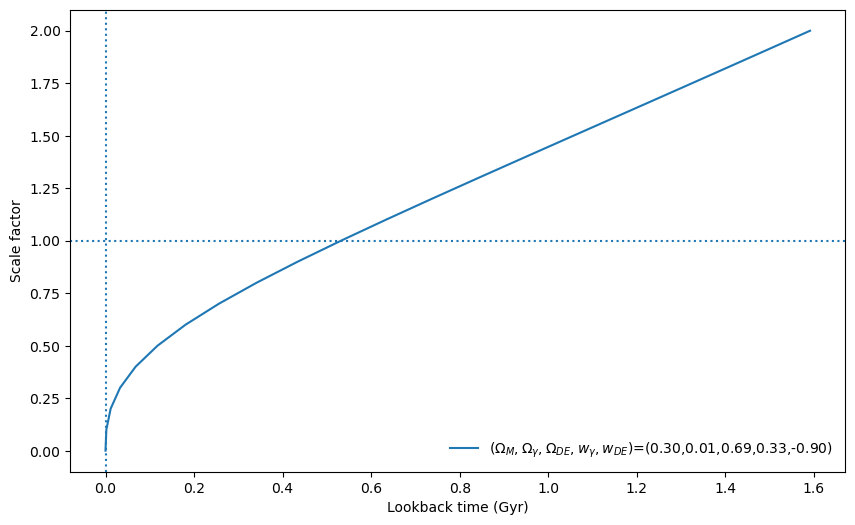

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define function to calculate 1/adot for the given matter density, radiation density, dark energy density, and their corresponding equations of state
def adotinv(a, om, orad, od, wr, wx):
    H0y = 1.0  # Hubble parameter for simplicity
    
    if a == 0:
        inner_expr = om + orad + (1 - om - orad - od)
    else:
        inner_expr = om / a**3 + orad / a**4 + (1 - om - orad - od) + od * a**(3 * (1 + wx))
    
    # Ensure that the inner expression is non-negative to avoid complex numbers
    if inner_expr < 0:
        inner_expr = 0
    
    sqrt_term = np.sqrt(inner_expr)
    Hubble_parameter = H0y * sqrt_term
    
    # Avoid division by zero
    if Hubble_parameter == 0:
        return np.inf  # Return infinity to indicate divergence
    
    return 1.0 / Hubble_parameter

# Define the range of scale factors
astart = 0.0
astop = 2.1
astep = 0.1
a_arr = np.arange(astart, astop, astep)

# Define the cosmological parameters for different scenarios
om = 0.3  # Matter density
orad = 0.01  # Radiation density
od = 0.69  # Dark energy density
wr = 1/3  # Radiation equation of state
wx = -0.9  # Dark energy equation of state

# Calculate the lookback time for the given scenario
t_lookback_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om, orad, od, wr, wx))[0] for a_end in a_arr])

# Plot the model
plt.figure(figsize=(10, 6))
plt.plot(t_lookback_Gyr, a_arr, label='$(\Omega_M,\Omega_{\gamma},\Omega_{DE},w_{\gamma},w_{DE})$=(%.2f,%.2f,%.2f,%.2f,%.2f)' % (om, orad, od, wr, wx))

# Add labels and legend
plt.axvline(x=0, linestyle=':')  # Plot some crosshairs 
plt.axhline(y=1, linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scale factor')
plt.legend(loc='lower right', frameon=False)
plt.show()


# Distances in cosmology

In [15]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
cH0mpc = c/H0kmsmpc   # c/H0 in Mpc  (the km/s cancel out in the numerator and denominator)
cH0Glyr = cH0mpc * 3.262 / 1000 #c/H0 in billions of light years.  There are 3.262 light year / parsec

In [16]:
import numpy as np
import scipy.integrate as integrate

# Constants
cH0Glyr = 299792.458 / 100   # Speed of light in km/s divided by Hubble constant in km/s/Mpc, to get Glyr

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    ok = 1.0 - om - ol
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Choose the redshift (e.g. z=0.3)
z = 0.3

# Choose a cosmology
om, ol = 0.3, 0.7

# Calculate the integral
xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0] 

# Sub in the required constants to get the comoving distance R_0*X
R0X = xx * cH0Glyr  # Distance in Glyr

print('Comoving distance to a galaxy at z=%.3f is %.2f Glyr' % (z, R0X))


Comoving distance to a galaxy at z=0.300 is 836.08 Glyr


In [17]:
# Given redshift
z = 0.3

# Cosmology parameters
om, ol = 0.3, 0.7

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    ok = 1.0 - om - ol
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Calculate the comoving distance at z=0.3
xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
R0X = xx * cH0Glyr

# Calculate the scale factor at different times
a_half_size = 0.5
a_at_emission = 1 / (1 + z)

# Calculate distances at different times
distance_half_size = a_half_size * R0X
distance_at_emission = a_at_emission * R0X

# Print the results
print('Distance to a galaxy at z=%.3f when a=0.5 is %.2f Glyr' % (z, distance_half_size))
print('Distance to a galaxy at z=%.3f when the light we see was emitted is %.2f Glyr' % (z, distance_at_emission))


Distance to a galaxy at z=0.300 when a=0.5 is 418.04 Glyr
Distance to a galaxy at z=0.300 when the light we see was emitted is 643.14 Glyr


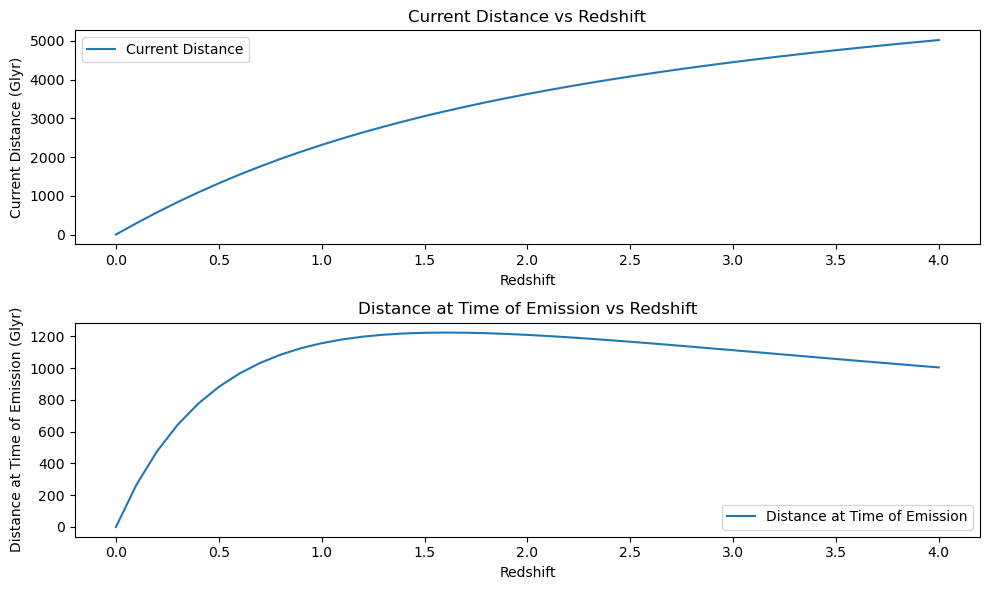

In [18]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Constants
cH0Glyr = 299792.458 / 100   # Speed of light in km/s divided by Hubble constant in km/s/Mpc, to get Glyr

# Cosmology parameters
om, ol = 0.3, 0.7

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    ok = 1.0 - om - ol
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Calculate comoving distance at different redshifts
def calculate_distances(zarr, om, ol):
    xarr = np.zeros(len(zarr))
    for i, z in enumerate(zarr):
        xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
        xarr[i] = xx * cH0Glyr
    return xarr

# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1
zarr = np.arange(zstart, zstop, zstep)

# Calculate distances at different redshifts for current distance and distance at time of emission
current_distance = calculate_distances(zarr, om, ol)
a_at_emission = 1 / (1 + zarr)
distance_at_emission = current_distance * a_at_emission

# Plotting
plt.figure(figsize=(10, 6))

# Plot current distance vs redshift
plt.subplot(2, 1, 1)
plt.plot(zarr, current_distance, label='Current Distance')
plt.xlabel('Redshift')
plt.ylabel('Current Distance (Glyr)')
plt.title('Current Distance vs Redshift')
plt.legend()

# Plot distance at time of emission vs redshift
plt.subplot(2, 1, 2)
plt.plot(zarr, distance_at_emission, label='Distance at Time of Emission')
plt.xlabel('Redshift')
plt.ylabel('Distance at Time of Emission (Glyr)')
plt.title('Distance at Time of Emission vs Redshift')
plt.legend()

plt.tight_layout()
plt.show()


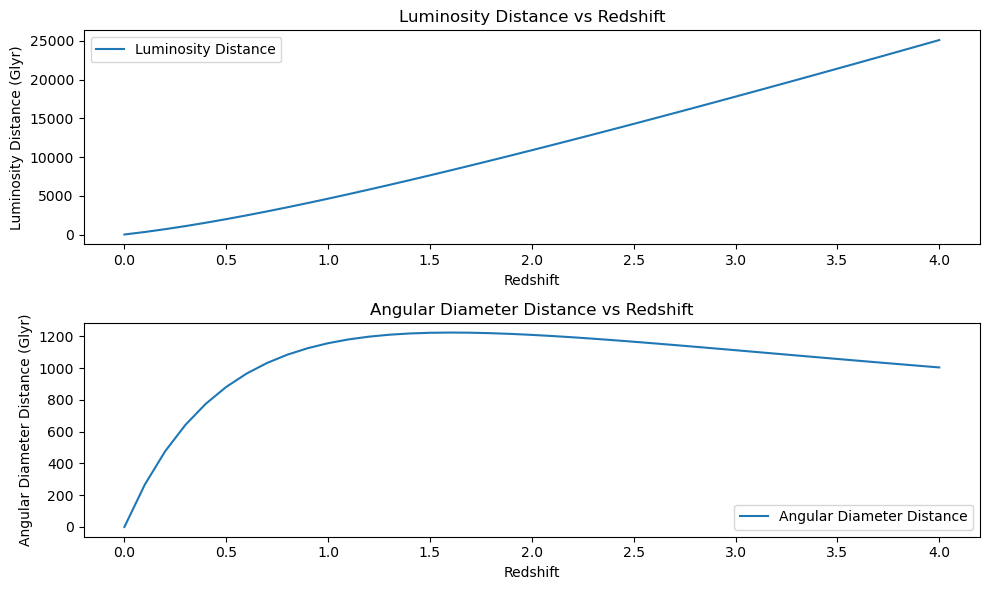

In [19]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Constants
cH0Glyr = 299792.458 / 100   # Speed of light in km/s divided by Hubble constant in km/s/Mpc, to get Glyr

# Cosmology parameters
om, ol = 0.3, 0.7
ok = 1.0 - om - ol

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Function to correct comoving distance for curvature
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk

# Calculate comoving distance at different redshifts
def calculate_distances(zarr, om, ol):
    xarr = np.zeros(len(zarr))
    for i, z in enumerate(zarr):
        xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
        dk = Sk(xx, ok)
        xarr[i] = xx * cH0Glyr
    return xarr

# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1
zarr = np.arange(zstart, zstop, zstep)

# Calculate comoving distances at different redshifts
current_distance = calculate_distances(zarr, om, ol)

# Calculate luminosity distance and angular diameter distance
DL = current_distance * (1 + zarr)
DA = current_distance / (1 + zarr)

# Plotting
plt.figure(figsize=(10, 6))

# Plot luminosity distance vs redshift
plt.subplot(2, 1, 1)
plt.plot(zarr, DL, label='Luminosity Distance')
plt.xlabel('Redshift')
plt.ylabel('Luminosity Distance (Glyr)')
plt.title('Luminosity Distance vs Redshift')
plt.legend()

# Plot angular diameter distance vs redshift
plt.subplot(2, 1, 2)
plt.plot(zarr, DA, label='Angular Diameter Distance')
plt.xlabel('Redshift')
plt.ylabel('Angular Diameter Distance (Glyr)')
plt.title('Angular Diameter Distance vs Redshift')
plt.legend()

plt.tight_layout()
plt.show()


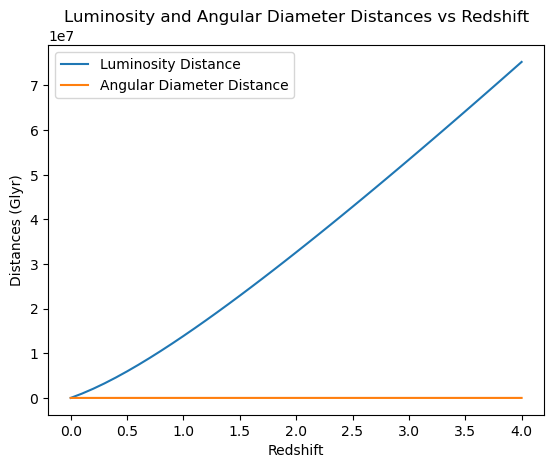

In [20]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Constants
cH0Glyr = 299792.458 / 100   # Speed of light in km/s divided by Hubble constant in km/s/Mpc, to get Glyr

# Cosmology parameters
om, ol = 0.3, 0.7
ok = 1.0 - om - ol

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Function to correct comoving distance for curvature
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk

# Calculate comoving distance at different redshifts
def calculate_distances(zarr, om, ol):
    xarr = np.zeros(len(zarr))
    for i, z in enumerate(zarr):
        xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
        dk = Sk(xx, ok)
        xarr[i] = xx * cH0Glyr
    return xarr

# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1
zarr = np.arange(zstart, zstop, zstep)

# Calculate comoving distances at different redshifts
R0X = calculate_distances(zarr, om, ol)

# Calculate luminosity distance and angular diameter distance
DL = Sk(R0X, ok) * (1 + zarr) * cH0Glyr
DA = R0X / (1 + zarr)

# Plotting
plt.plot(zarr, DL, label='Luminosity Distance')
plt.plot(zarr, DA, label='Angular Diameter Distance')
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Distances (Glyr)')
plt.title('Luminosity and Angular Diameter Distances vs Redshift')
plt.show()
